# K-Nearest Neighbour

First we added all the libraries required and then we uploaded the file we're going to use. Furthermore we looked at our data how the data was structured by using the head function.

In [71]:
import pandas as pd
from pandas.api.types import CategoricalDtype
from IPython.display import display, Markdown
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

SlpHth = pd.read_csv("https://raw.githubusercontent.com/TomdeFluiter/Project-Data-Mining/main/Sleep_health_and_lifestyle_dataset.csv")
SlpHth.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Then we removed the Person ID, because it was unnecessary and clouded our numeric data.

In [72]:
SlpHth = SlpHth.drop(['Person ID'], axis=1)
SlpHth.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Then to get a nice view of which data was numeric and which data were string, we used the info function. After that we excluded all the string data by using the drop function on the excluded. Afterwards we wcreated a scattermatrix and histogram for all the numeric columns, to find out which data had a correlation.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


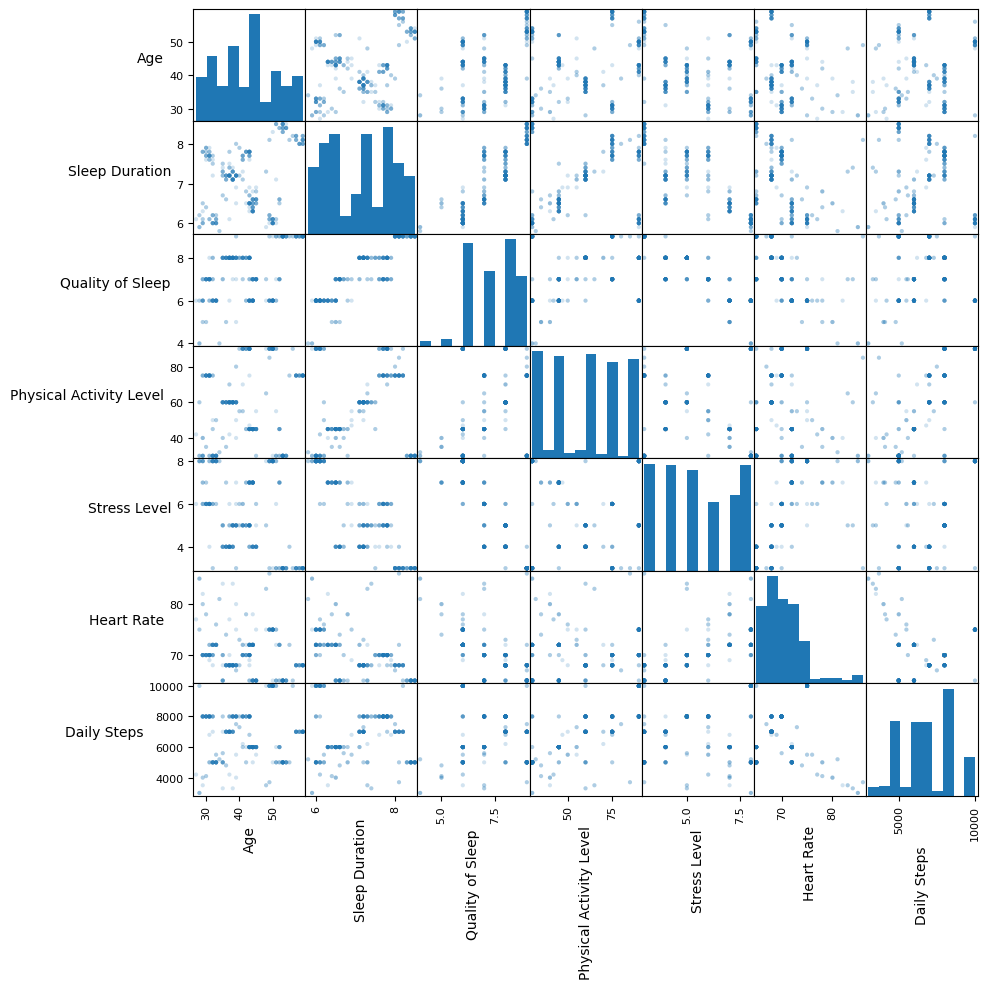

In [73]:
SlpHth.info()

excluded = ["Gender","Occupation","BMI Category","Sleep Disorder"]
selSlpHth = SlpHth.drop(excluded, axis=1)

fig = scatter_matrix(selSlpHth, alpha=0.2, figsize=(10, 10), diagonal="hist")

for ax in fig.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha("right")

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

We found out that there were four categories in BMI Category: 'Normal','Normal Weight','Overweight' and 'Obese'. Normal Weight was redundant and needed to be transformed into Normal to get a better view of the results. Then we watched the value counts and percentages of the different 'Categories'.

In [74]:
SlpHth['BMI Category'] = SlpHth['BMI Category'].replace('Normal Weight', 'Normal') 
cntDiag = SlpHth['BMI Category'].value_counts()
propDiag = SlpHth['BMI Category'].value_counts(normalize=True)
cntDiag


BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [75]:
propDiag

BMI Category
Normal        0.577540
Overweight    0.395722
Obese         0.026738
Name: proportion, dtype: float64

Before going further we first needed to make them into categories (in Python), which we did here. Otherwise KNN won't work.

In [76]:
catType = CategoricalDtype(categories=["Normal", "Overweight", "Obese"], ordered=False)
SlpHth['BMI Category'] = SlpHth['BMI Category'].astype(catType)
SlpHth['BMI Category']

0      Overweight
1          Normal
2          Normal
3           Obese
4           Obese
          ...    
369    Overweight
370    Overweight
371    Overweight
372    Overweight
373    Overweight
Name: BMI Category, Length: 374, dtype: category
Categories (3, object): ['Normal', 'Overweight', 'Obese']

After viewing the scatterplots we found out that Heart Rate and Daily Steps had a good correlation, besides that we also thought it would be good indicators for the BMI Category.

In [77]:
SlpHth[['Heart Rate', 'Daily Steps']].describe()

,Heart Rate,Daily Steps
count,374.000000,374.000000
mean,70.165775,6816.844920
std,4.135676,1617.915679
min,65.000000,3000.000000
25%,68.000000,5600.000000
50%,70.000000,7000.000000
75%,72.000000,8000.000000
max,86.000000,10000.000000


We normalized the values for Hearth Rate and Daily Steps so it would be evenly tested. Not that one had a greater impact than the other.

In [78]:
def normalize(x):
  return((x - min(x)) / (max(x) - min(x))) 

testSet1 = np.arange(1,6)
testSet2 = np.arange(1,6) * 10



print(f'testSet1: {testSet1}\n')
print(f'testSet2: {testSet2}\n')
print(f'Normalized testSet1: {normalize(testSet1)}\n')
print(f'Normalized testSet2: {normalize(testSet2)}\n')

testSet1: [1 2 3 4 5]

testSet2: [10 20 30 40 50]

Normalized testSet1: [0.   0.25 0.5  0.75 1.  ]

Normalized testSet2: [0.   0.25 0.5  0.75 1.  ]



In [79]:
excluded = ["Blood Pressure","Gender","Age","Sleep Duration","Quality of Sleep","Physical Activity Level","Stress Level","Occupation","BMI Category","Sleep Disorder"] 
X = SlpHth.loc[:, ~SlpHth.columns.isin(excluded)]
X = X.apply(normalize, axis=0)
X[['Heart Rate', 'Daily Steps']].describe()

,Heart Rate,Daily Steps
count,374.000000,374.000000
mean,0.245989,0.545264
std,0.196937,0.231131
min,0.000000,0.000000
25%,0.142857,0.371429
50%,0.238095,0.571429
75%,0.333333,0.714286
max,1.000000,1.000000


Than we added the train and tests, we used test_size 0.3 because after trying different sizes this one came out with the best results.

In [80]:
y = SlpHth['BMI Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y) 

Then we made an array of the test-data by using KNN. We experimented with the n_neighbors function, but we got the best result with using the (standard) five.

In [81]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
cm

array([[51,  0, 14],
       [ 0,  3,  0],
       [ 3,  0, 42]])

Then we used the test-data to create a nice (confusion)matrix to illustrate better what the results were of the training/testing data. We also changed the color of the matrix and added percentages where the percentages were higher than 0. You see that the test data is accurate for 84,95% and is wrong for 15,05%. It doesn't get the results wrong in like big steps (from normal to obese or the other way around). It's worse for the clients that the testresults are wrong when the overweighted clients are predicted normal then the other way around. Though every wrong predicted testresult is wrong of course, but it's worse to say to a client they are healthy when they are really not than when you tell normal weighted clients they are overweighted because then after more testing the results will differ.

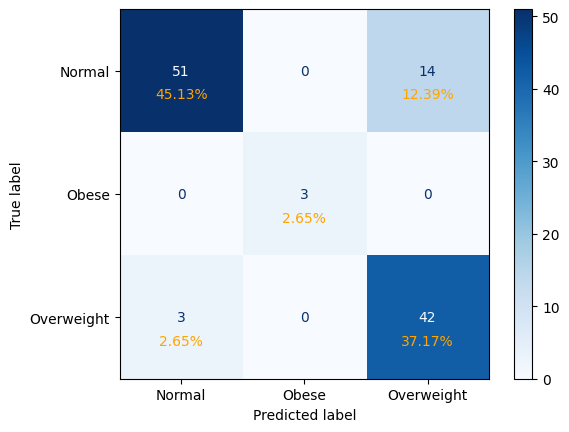

In [82]:
cm_percentage = cm.astype('float') / cm.sum() * 100
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm_percentage[i, j] > 0: 
            plt.text(j, i+0.25, f"{cm_percentage[i, j]:.2f}%", 
                 ha="center", va="bottom", color="orange")
plt.show()


# XGBoost

We re-uploaded the dataset and installed the XGBoost and imported all the necessary libraries.

In [83]:
SlpHth.to_csv('SlpHth.csv', index=False)

In [84]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [85]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

Then we used XGBoost for our data instead of KNN to see if the accuracy of our test data will improve. Firstly we created the test-data and set up some selfcreated parameters. After that we ran the test-data with XGBoost and there came a better accuracy score out than with KNN. 89,38% instead of 84,95%.

In [86]:
data = pd.read_csv('SlpHth.csv')
X2 = data[['Heart Rate', 'Daily Steps']]
y2 = data['BMI Category']

le = LabelEncoder()
y2_encoded = le.fit_transform(y2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2_encoded, test_size=0.3, random_state=123)

dtrain = xgb.DMatrix(X2_train, label=y2_train)
dtest = xgb.DMatrix(X2_test, label=y2_test)

params = {
    'objective': 'multi:softmax',  
    'num_class': len(y2.unique()),  
    'max_depth': 4,  
    'eta': 0.3,  
    'eval_metric': 'mlogloss',  
    'random_state': 123
}

bst = xgb.train(params, dtrain, num_boost_round=100)

y2_pred = bst.predict(dtest)

y2_pred_original = le.inverse_transform(y2_pred.astype(int))

accuracy = accuracy_score(y2_test, y2_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8938


Then we created the array and (confusion)matrix again and learned from the results. The results were (as the accuracy showed) better predicted than with KNN. Though there would be a risk by extremely predicting the wrong category, As there is predicted that a client has a normal weight even though they have obese. Also as explained earlier with KNN, it is worse to predict normal weight for overweighted clients then vice versa. So compared to KNN, XGBoost is worse in this instance. Though XGBoost has an higher test accuracy, so it depends on what is more crucial for the user to use.

In [87]:
cm2 = confusion_matrix(y2_test, y2_pred)
cm2

array([[59,  0,  2],
       [ 1,  4,  0],
       [ 9,  0, 38]])

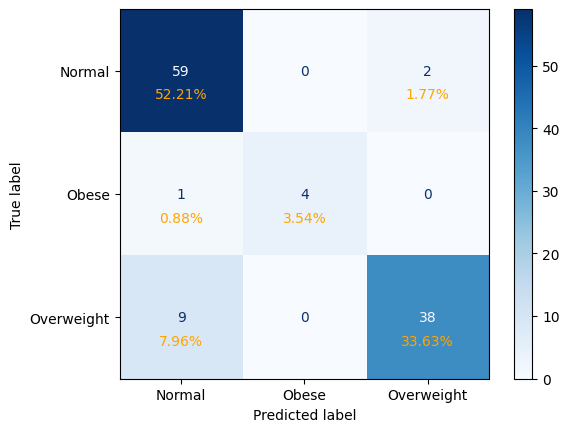

In [88]:
cm2_percentage = cm2.astype('float') / cm2.sum() * 100
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)

for i in range(cm2.shape[0]):
    for j in range(cm2.shape[1]):
        if cm2_percentage[i, j] > 0: 
            plt.text(j, i+0.25, f"{cm2_percentage[i, j]:.2f}%", 
                 ha="center", va="bottom", color="orange")
plt.show()

## Optuna

Firstly we installed Optuna, to optimize the paramaters of XGBoost to have a better accuracy testscore.

In [89]:
!pip install optuna

We almost repeated the code of the XGBoost except now by using optuna he is trying to find the best paramters in 100 trials. After running those trials it will use the trial with the best accuracy result. In this case the best trial accuracy result was 92,04%. Which is of course a higher score than with KNN and the XGBoost of before.

In [90]:
import optuna

X3 = data[['Heart Rate', 'Daily Steps']]
y3 = data['BMI Category']

le = LabelEncoder()
y3_encoded = le.fit_transform(y3)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3_encoded, test_size=0.3, random_state=123)

def objective(trial):
    params = {
        'objective': 'multi:softmax',
        'num_class': len(y3.unique()),
        'max_depth': trial.suggest_int('max_depth', 1, 20),
        'eta': trial.suggest_float('eta', 0.01, 0.5, log=True),
        'eval_metric': 'mlogloss',
        'random_state': 123
    }

    dtrain = xgb.DMatrix(X3_train, label=y3_train)
    dtest = xgb.DMatrix(X3_test, label=y3_test)
    bst = xgb.train(params, dtrain, num_boost_round=trial.suggest_int('num_boost_round', 1, 300))

    y3_pred = bst.predict(dtest)

    accuracy = accuracy_score(y3_test, y3_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2024-10-07 10:46:30,832] A new study created in memory with name: no-name-e4abd840-882d-4314-89b2-e204b2015db3
[I 2024-10-07 10:46:30,880] Trial 0 finished with value: 0.8938053097345132 and parameters: {'max_depth': 4, 'eta': 0.03644636231766525, 'num_boost_round': 28}. Best is trial 0 with value: 0.8938053097345132.
[I 2024-10-07 10:46:30,941] Trial 1 finished with value: 0.9203539823008849 and parameters: {'max_depth': 3, 'eta': 0.04213023173573557, 'num_boost_round': 29}. Best is trial 1 with value: 0.9203539823008849.
[I 2024-10-07 10:46:30,964] Trial 2 finished with value: 0.8938053097345132 and parameters: {'max_depth': 5, 'eta': 0.011681581784300678, 'num_boost_round': 40}. Best is trial 1 with value: 0.9203539823008849.
[I 2024-10-07 10:46:31,016] Trial 3 finished with value: 0.8938053097345132 and parameters: {'max_depth': 19, 'eta': 0.25591379707174533, 'num_boost_round': 102}. Best is trial 1 with value: 0.9203539823008849.
[I 2024-10-07 10:46:31,120] Trial 4 finished wi

Best parameters: {'max_depth': 3, 'eta': 0.04213023173573557, 'num_boost_round': 29}
Best accuracy: 0.9203539823008849


After finding out the best parameters for the module, we repeated the code with those parameters. We did this because there would otherwise be a error later on because y3_pred was in a function.

In [91]:
X3 = data[['Heart Rate', 'Daily Steps']]
y3 = data['BMI Category']

le = LabelEncoder()
y3_encoded = le.fit_transform(y3)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3_encoded, test_size=0.3, random_state=123)

dtrain = xgb.DMatrix(X3_train, label=y3_train)
dtest = xgb.DMatrix(X3_test, label=y3_test)

params = {
    'objective': 'multi:softmax', 
    'num_class': len(y3.unique()),  
    'max_depth': 1,  
    'eta': 0.49348274564434674,  
    'eval_metric': 'mlogloss',  
    'random_state': 123,
    'num_boost_round': 34
}

bst = xgb.train(params, dtrain, num_boost_round=100)

y3_pred = bst.predict(dtest)

y3_pred_original = le.inverse_transform(y3_pred.astype(int))

accuracy = accuracy_score(y3_test, y3_pred)
print(f'Accuracy: {accuracy:.4f}')

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:46:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9204


Then we made an array and (confusion)matrix again and it resulted in a better predicting testdata then before. This was no surprise because the accuracy score was better. Although what was told with the earlier XGBoost module is still applied at this module. But it can be concluded that with XGBoost and the help of Optuna the testing data would be more accurate than if you use KNN.

In [92]:
cm3 = confusion_matrix(y3_test, y3_pred)
cm3

array([[61,  0,  0],
       [ 1,  4,  0],
       [ 8,  0, 39]])

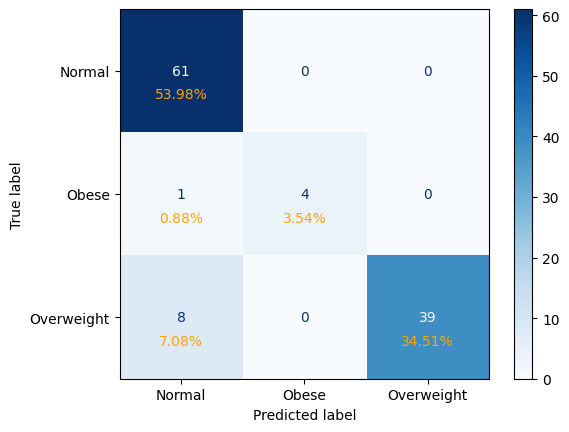

In [93]:
cm3_percentage = cm3.astype('float') / cm3.sum() * 100
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)

for i in range(cm3.shape[0]):
    for j in range(cm3.shape[1]):
        if cm3_percentage[i, j] > 0: 
            plt.text(j, i+0.25, f"{cm3_percentage[i, j]:.2f}%", 
                 ha="center", va="bottom", color="orange")
plt.show()